# Task
Implement a random forest classification model on the "Social_Network_Ads.csv" dataset, including data preparation, training, prediction, evaluation, and visualization of the results.

## Load the dataset

### Subtask:
Load the "Social_Network_Ads.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Social_Network_Ads.csv')
display(df.head())

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Prepare the data

### Subtask:
Separate the features (independent variables) and the target variable (dependent variable). Split the data into training and testing sets.


**Reasoning**:
Separate features and target, then split the data into training and testing sets.



In [2]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

display(X_train.head())
display(y_train.head())

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000


,Purchased
250,0
63,1
312,0
159,1
283,1


## Feature scaling

### Subtask:
Scale the features to ensure that all features have a similar range of values. This is important for many machine learning algorithms, including random forests.


**Reasoning**:
Scale the training and testing features using StandardScaler.



In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled[:5])
display(X_test_scaled[:5])

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ]])

## Train the random forest model

### Subtask:
Train a Random Forest Classifier model on the training data.


**Reasoning**:
Train a Random Forest Classifier model on the scaled training data.



In [4]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

## Make predictions

### Subtask:
Use the trained model to make predictions on the test data.


**Reasoning**:
Use the trained classifier to predict on the scaled test data.



In [5]:
y_pred = classifier.predict(X_test_scaled)
display(y_pred[:5])

array([0, 0, 0, 0, 0])

## Evaluate the model

### Subtask:
Evaluate the performance of the model using appropriate metrics such as accuracy, precision, recall, and F1-score.


**Reasoning**:
Calculate and print the evaluation metrics as requested by the instructions.



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9200
Precision: 0.8750
Recall: 0.8750
F1-score: 0.8750


## Visualize the results

### Subtask:
Visualize the classification results, for example, using a confusion matrix or a decision boundary plot.


**Reasoning**:
Compute and visualize the confusion matrix to evaluate the classification results.



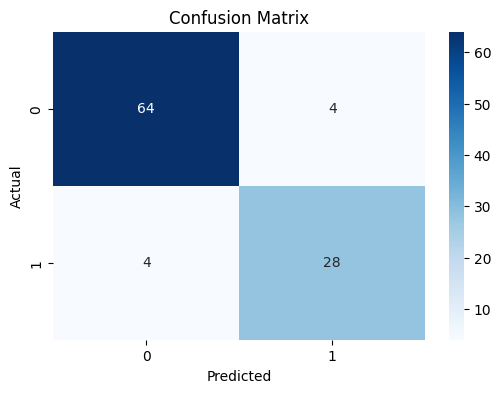

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded and split into training and testing sets, with 75% of the data used for training and 25% for testing.
*   Feature scaling was applied to both the training and testing sets using `StandardScaler`.
*   A Random Forest Classifier with 10 estimators was trained on the scaled training data.
*   Predictions were made on the scaled test data.
*   The model achieved an accuracy of 0.9200 on the test set.
*   The precision, recall, and F1-score of the model were all 0.8750.
*   A confusion matrix was generated and visualized, showing the counts of true positives, true negatives, false positives, and false negatives in the test predictions.

### Insights or Next Steps

*   The Random Forest model shows promising performance with a high accuracy, precision, recall, and F1-score.
*   Further analysis could involve tuning the hyperparameters of the Random Forest classifier (e.g., `n_estimators`, `max_depth`) to potentially improve performance or explore feature importance to understand which features contribute most to the predictions.
